In [2]:
import pandas as pd
import numpy as np

import os
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
embedding = MDS(n_components=2)
scaler = StandardScaler()
to_use = county.drop(['percentage20_Donald_Trump', 'percentage20_Joe_Biden'], axis=1)
to_use = to_use[['pct_college',
                'Hispanic',
                'White',
                'Black',
                'Native',
                'Asian',
                'Pacific',
                'IncomePerCap',
                'Poverty',
                'Unemployment']]
vals = scaler.fit_transform(to_use.values)

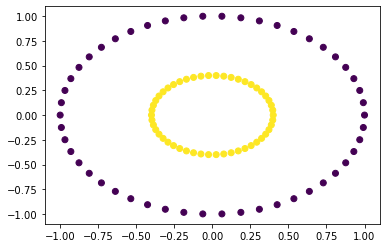

In [3]:
from sklearn.datasets import make_circles
data = make_circles(n_samples=100, factor=0.4)
circle_colors = data[1]
_ = plt.scatter(data[0][:,0], data[0][:,1],c=circle_colors)
plt.show()

In [4]:
Lambda = np.array([[1.,2.,3.,4.,5.,0.],
                    [0.,0.,5.,3.,1.,1.]])
high_dim = data[0] @ Lambda + np.random.normal(0., .1, size=(100,6))

In [5]:
embedding = MDS(n_components=2)
vals = embedding.fit_transform(high_dim)
vals.shape

(100, 2)

In [6]:
data[0].shape

(100, 2)

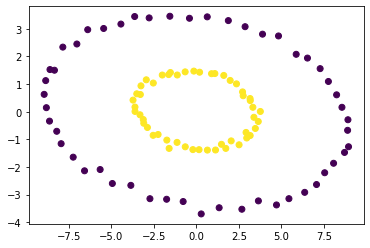

In [7]:
_ = plt.scatter(vals[:,0], vals[:,1],c=circle_colors)
plt.show()

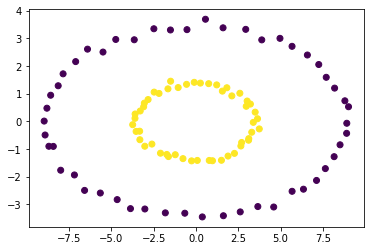

In [8]:
from sklearn.decomposition import PCA
pca = PCA(2)
projs = pca.fit_transform(high_dim)
_ = plt.scatter(projs[:,0], projs[:,1], c=circle_colors)
plt.show()

# implemnet mds on our own

In [9]:
from sklearn.metrics import pairwise_distances
centered = high_dim - high_dim.mean(0)
Gram = centered @ centered.T
evals,evecs = np.linalg.eigh(Gram)

In [11]:
evals[-2:]

array([ 345.45014295, 2293.45657939])

In [12]:
projections = evecs[:,-2:]*np.sqrt(evals[-2:])

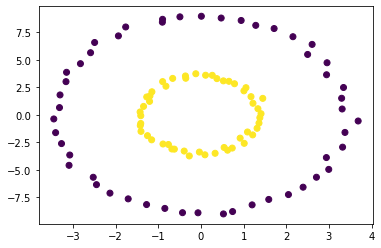

In [13]:
_ = plt.scatter(projections[:,0], projections[:,1],c=circle_colors)
plt.show()

In [16]:
from sklearn.metrics import pairwise_distances
centered = high_dim - high_dim.mean(0)
dist_matrix = pairwise_distances(centered, metric='cosine')
dist_matrix.shape

(100, 100)

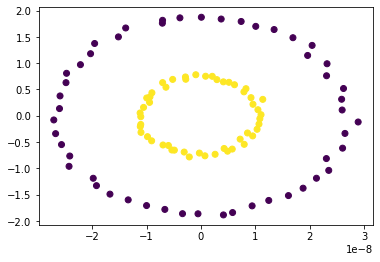

In [17]:
evals, evcs = np.linalg.eigh(dist_matrix)
projections = evecs[:,-2:]*np.sqrt(evals[-2:])
_ = plt.scatter(projections[:,0],projections[:,1],c = circle_colors)
plt.show()

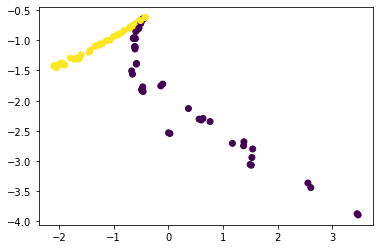

In [18]:
dist_matrix = pairwise_distances(centered, metric='braycurtis')
evals, evecs = np.linalg.eigh(dist_matrix)
projections = evecs[:,-2:] * np.sqrt(evals[-2:])
_ = plt.scatter(projections[:,0], projections[:,1],c=circle_colors)
plt.show()

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [21]:
D= pd.read_csv("mds_data.csv", index_col = 0)
D

,Atlanta,Chicago,Denver,Houston,Los Angeles,Miami,New York,San Francisco,Seattle,Washington D.C.
Atlanta,0,587,1212,701,1936,604,748,2139,2182,543
Chicago,587,0,920,940,1745,1188,713,1858,1737,597
Denver,1212,920,0,879,831,1726,1631,949,1021,1494
Houston,701,940,879,0,1374,968,1420,1645,1891,1220
Los Angeles,1936,1745,831,1374,0,2339,2451,347,959,2300
Miami,604,1188,1726,968,2339,0,1092,2594,2734,923
New York,748,713,1631,1420,2451,1092,0,2571,2408,205
San Francisco,2139,1858,949,1645,347,2594,2571,0,678,2442
Seattle,2182,1737,1021,1891,959,2734,2408,678,0,2329
Washington D.C.,543,597,1494,1220,2300,923,205,2442,2329,0


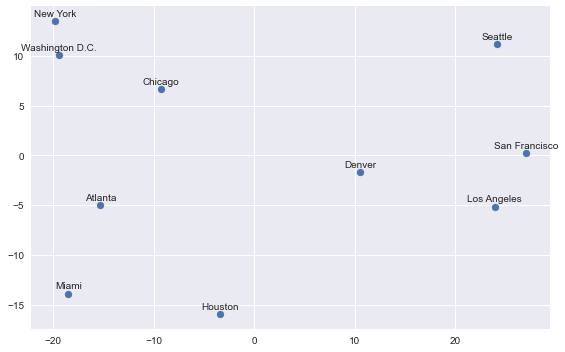

In [23]:
def MDS(D,n_components =2):
    names = D.columns
    D = D.values.astype(float)
    D-= D.mean(0)
    D = D.T - D.T.mean(0)
    G = -0.5*D
    evals, evecs = np.linalg.eig(G)
    idx = np.argsort(evals)[::-1][:n_components]
    evals = evals[idx]
    evecs = evecs[:,idx]
    scores = evecs * np.sqrt(evals)
    return pd.DataFrame(scores,index = names)

X = MDS(D,2)
fig,ax= plt.subplots(1,1,figsize = (8,5))
plt.scatter(X.values[:,0],X.values[:,1])
for names, (x,y) in X.iterrows():
    ax.text(x,y+0.5,names,horizontalalignment = 'center')
plt.tight_layout()


In [26]:
e = np.array([4,5,1,3,2])
np.argsort(e)

array([2, 4, 3, 0, 1], dtype=int64)